In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from unidecode import unidecode

In [78]:
# Carregue os dados do CSV em um DataFrame do Pandas:
df = pd.read_csv('./dados.csv', delimiter=';')

dataframes_por_letra = {}

# Separe o DataFrame por letra inicial:
for letra in df['Name'].str[0].unique():
    dataframes_por_letra[letra] = df[df['Name'].str[0] == letra]


In [79]:
letras = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
data = []


In [80]:
for letra in letras:
  df = dataframes_por_letra[letra]

  # Divida os dados em recursos e rótulos:
  X = df['Name']
  y = df['Gender']

  # Remova acentos e caracteres problemáticos:

  def remove_accents(text):
      return unidecode(text)
  
  # Transforme os dados de texto em vetores numéricos usando o CountVectorizer do Scikit-learn:
  vectorizer = CountVectorizer(preprocessor=remove_accents)
  X = vectorizer.fit_transform(X)

  # Divida os dados em conjuntos de treinamento e teste:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Padronize os recursos usando o StandardScaler do Scikit-learn:
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train.toarray())
  X_test = scaler.transform(X_test.toarray())

  # Crie um modelo sequencial com o Keras:
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  # Compile o modelo com a função de perda, otimizador e métricas:
  optimizer = Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy',
                optimizer=optimizer, metrics=['accuracy'])

  # Treine o modelo com os dados de treinamento:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                      validation_data=(X_test, y_test), callbacks=[early_stopping])

  # Avalie o desempenho do modelo com os dados de teste:
  score = model.evaluate(X_test, y_test, batch_size=32)
  print(f"Acurácia da letra {letra}: ", score[1])

  data.append({'letter': letra, 'accuracy': score[1]})


Epoch 1/20
377/377 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.6138 - val_loss: nan - val_accuracy: 0.6550
Epoch 2/20
377/377 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.6573 - val_loss: nan - val_accuracy: 0.6550
Epoch 3/20
95/95 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6550
Acurácia da letra A:  0.6550348997116089
Epoch 1/20
143/143 [==============================] - 2s 7ms/step - loss: 0.8364 - accuracy: 0.5126 - val_loss: 0.7440 - val_accuracy: 0.4518
Epoch 2/20
143/143 [==============================] - 1s 5ms/step - loss: 0.4776 - accuracy: 0.7238 - val_loss: 1.6619 - val_accuracy: 0.3975
Epoch 3/20
143/143 [==============================] - 1s 5ms/step - loss: 0.2250 - accuracy: 0.8745 - val_loss: 2.1857 - val_accuracy: 0.3967
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 2.4199 - accuracy: 0.3967
Acurácia da letra B:  0.3966725170612335
Epoch 1/20
211/211 [=======

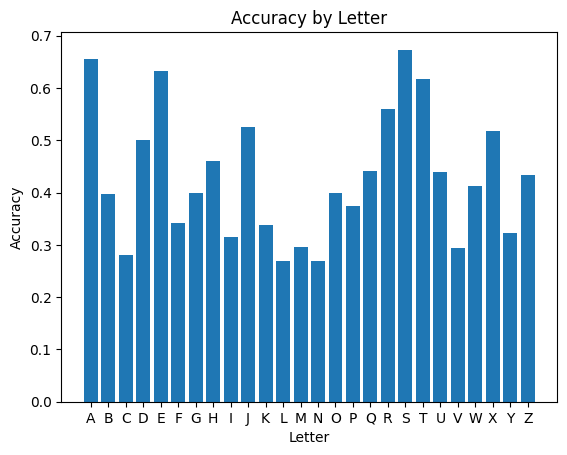

In [83]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
plt.bar(df['letter'], df['accuracy'])
plt.xlabel('Letter')
plt.ylabel('Accuracy')
plt.title('Accuracy by Letter')
plt.show()

In [ ]:
# Classifique o nome "Afonso":
name_to_classify = vectorizer.transform(["Afonso"])
predicted_gender = model.predict(name_to_classify)
predicted_gender = np.round(predicted_gender)
print("O gênero do nome Afonso é:", predicted_gender)